In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data= pd.read_csv('dataset/adult.csv', na_values=['?'])

In [3]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education-num   45222 non-null  int64 
 5   marital-status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital-gain    45222 non-null  int64 
 11  capital-loss    45222 non-null  int64 
 12  hours-per-week  45222 non-null  int64 
 13  native-country  45222 non-null  object
 14  income          45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [8]:
new_output = []
for value in data['income']:
    if value == '<=50K' or value == '<=50K.':
        new_output.append(0)
    elif value == '>50K' or value == '>50K.':
        new_output.append(1)
    
print("Anzahl 1: " + str(len(new_output)))
print("Anzahl 2: " + str(len(data['income'])))
data['income'] = new_output

Anzahl 1: 45222
Anzahl 2: 45222


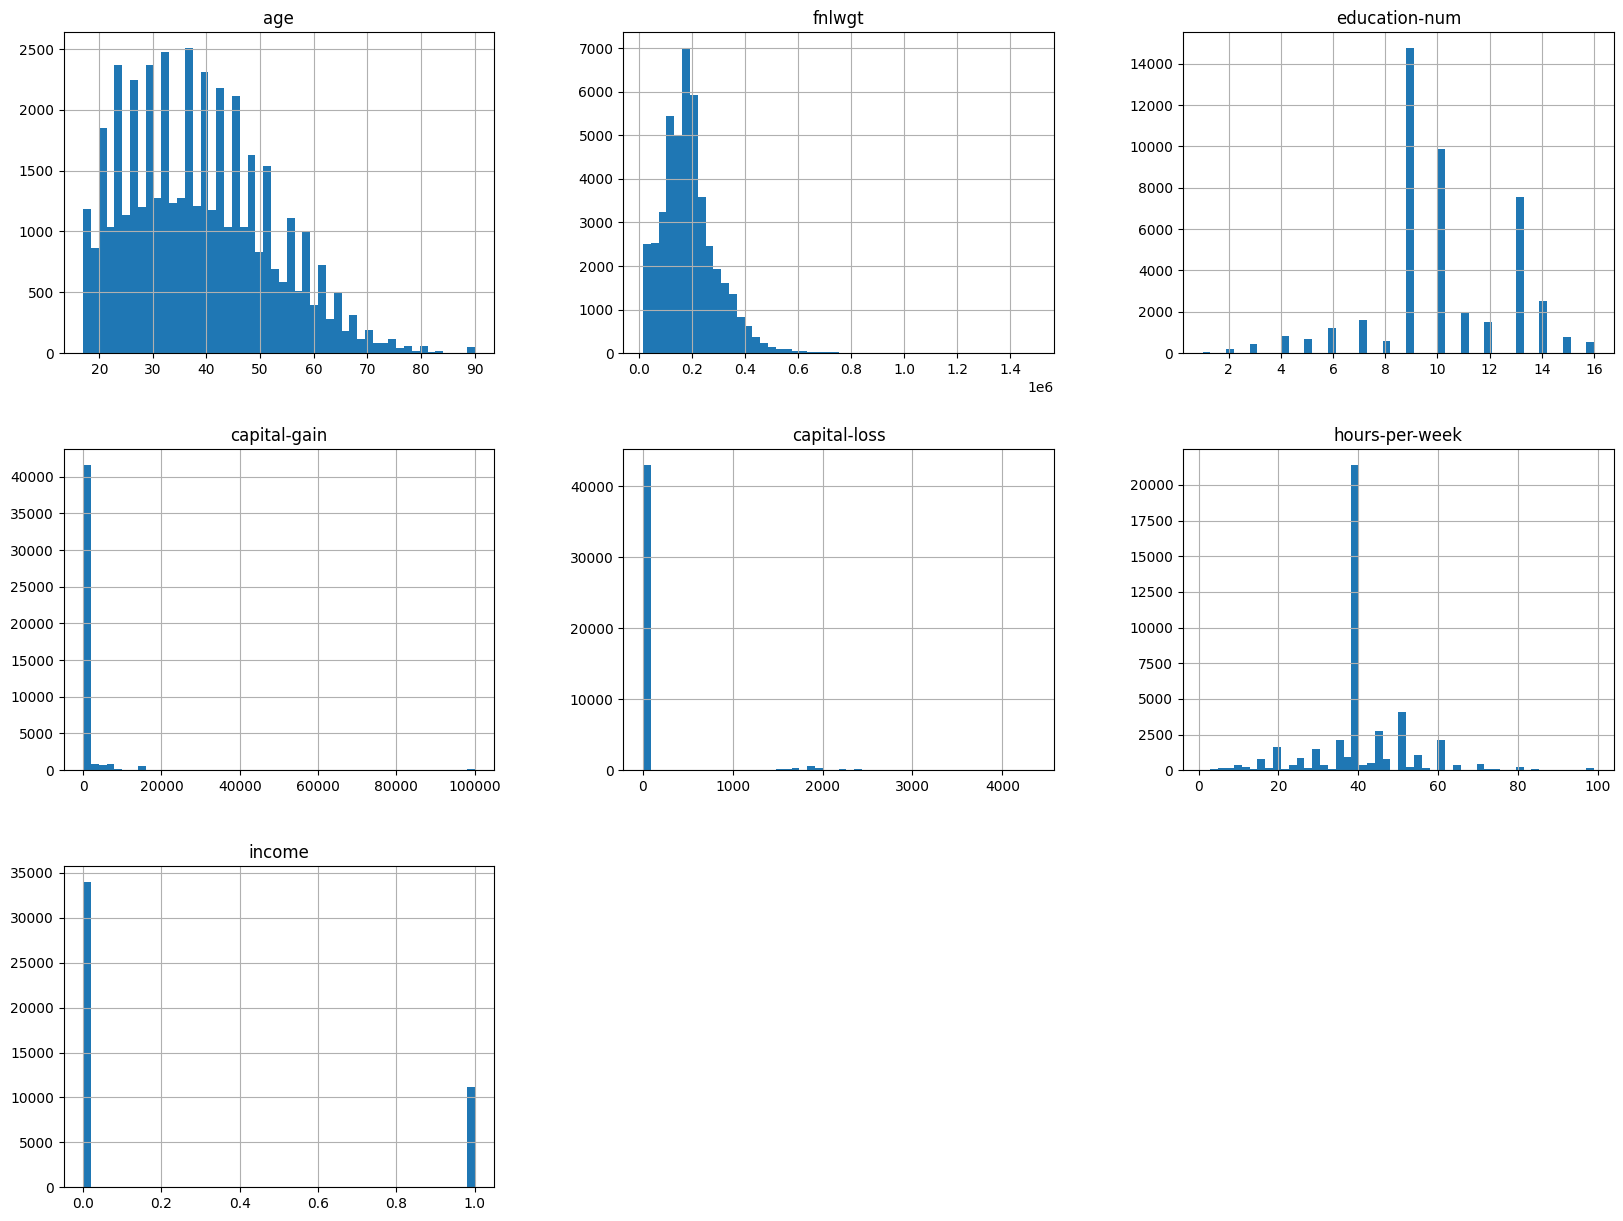

In [9]:
import matplotlib.pyplot as plt 
data.hist(bins=50,figsize=(20,15))
plt.show()

In [10]:
y=data["income"]
data.drop("income", axis=1, inplace=True)

In [11]:
data['workclass']=data['workclass'].astype('category')
data['education']=data['education'].astype('category')
data['marital-status']=data['marital-status'].astype('category')
data['occupation']=data['occupation'].astype('category')
data['relationship']=data['relationship'].astype('category')
data['race']=data['race'].astype('category')
data['sex']=data['sex'].astype('category')
data['native-country']=data['native-country'].astype('category')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36177, 14), (9045, 14), (36177,), (9045,))

In [14]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score

In [15]:
model = xgb.XGBClassifier(enable_categorical=True, n_estimators=40, max_depth=5)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

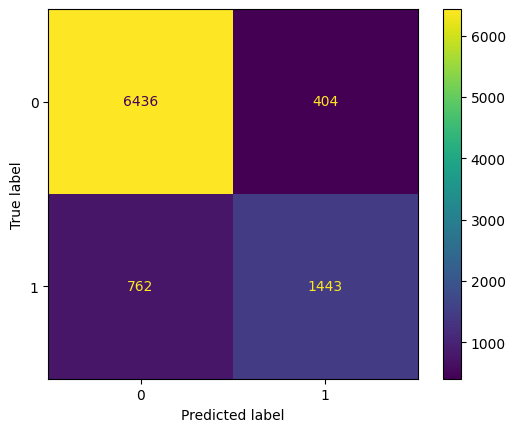

In [16]:
#y_pred = model.predict(X_test)
prediction_xgbc=model.predict_proba(X_test)
lr_probs = prediction_xgbc[:, 1]
y_pred = (lr_probs > 0.5).astype(int)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred), display_labels=[0, 1])
cm_display.plot()
plt.show()

In [17]:
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->>\n {classification_report(y_test,y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.8710889994472084
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[6436  404]
 [ 762 1443]]
-------------------------------------------------------------------------
The Classification Report is: ---->>
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      6840
           1       0.78      0.65      0.71      2205

    accuracy                           0.87      9045
   macro avg       0.84      0.80      0.81      9045
weighted avg       0.87      0.87      0.87      9045

F1-Score: 0.7122408687068115


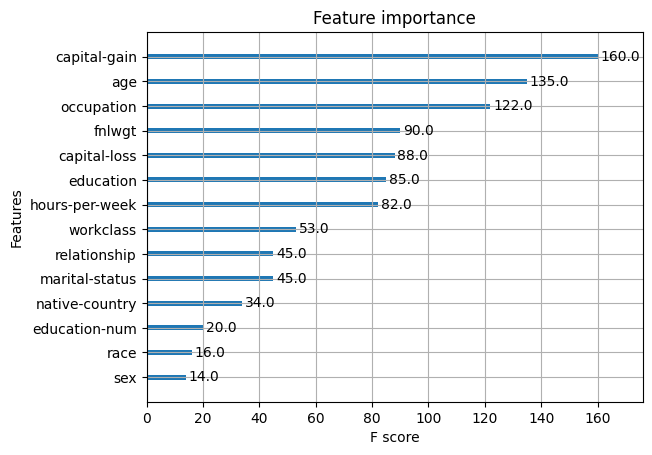

In [18]:
# Ein Diagramm, das die Wichtigkeit der Features zeigt
xgb.plot_importance(model)
plt.show()